<a href="https://colab.research.google.com/github/thomassems/UFC-Fight-Analytics/blob/main/fight_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
train_data = pd.read_csv("ufc.csv")
train_data.head(5)

,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7417 non-null   object 
 1   Fighter 1      7417 non-null   object 
 2   Fighter 2      7413 non-null   object 
 3   Fighter_1_KD   7413 non-null   float64
 4   Fighter_2_KD   7413 non-null   float64
 5   Fighter_1_STR  7413 non-null   float64
 6   Fighter_2_STR  7413 non-null   float64
 7   Fighter_1_TD   7413 non-null   float64
 8   Fighter_2_TD   7413 non-null   float64
 9   Fighter_1_SUB  7413 non-null   float64
 10  Fighter_2_SUB  7413 non-null   float64
 11  Weight_Class   7413 non-null   object 
 12  Method         7413 non-null   object 
 13  Round          7413 non-null   float64
 14  Time           7413 non-null   object 
 15  Event Name     7413 non-null   object 
 16  Date           7412 non-null   object 
 17  Winner         7414 non-null   object 
dtypes: float

In [3]:
type(train_data)
# drop unneccessary categories
train_data.drop('Location', axis=1, inplace=True)
# to drop multiple categories do something like ['Location', 'Date']
train_data.head()

,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady
4,Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva


In [4]:
train_data.isnull().sum()

Fighter 1        0
Fighter 2        4
Fighter_1_KD     4
Fighter_2_KD     4
Fighter_1_STR    4
Fighter_2_STR    4
Fighter_1_TD     4
Fighter_2_TD     4
Fighter_1_SUB    4
Fighter_2_SUB    4
Weight_Class     4
Method           4
Round            4
Time             4
Event Name       4
Date             5
Winner           3
dtype: int64

In [5]:
print(train_data.columns)

Index(['Fighter 1', 'Fighter 2', 'Fighter_1_KD', 'Fighter_2_KD',
       'Fighter_1_STR', 'Fighter_2_STR', 'Fighter_1_TD', 'Fighter_2_TD',
       'Fighter_1_SUB', 'Fighter_2_SUB', 'Weight_Class', 'Method', 'Round',
       'Time', 'Event Name', 'Date', 'Winner'],
      dtype='object')


**Analysis of the Method of Victory and Changes throughout the Years**

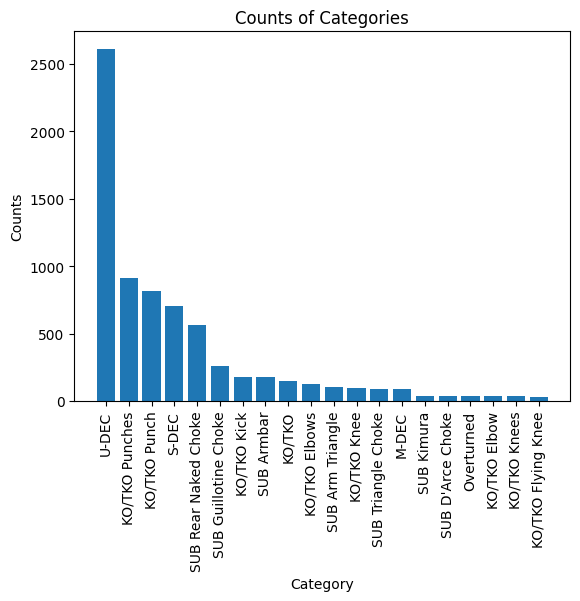

In [6]:
category_counts = train_data['Method'].value_counts()
top_10_categories = category_counts.head(20)
categories = top_10_categories.index
counts = top_10_categories.values

plt.bar(categories, counts)  # Create bar chart
plt.xlabel('Category')  # Label the x-axis as "Category"
plt.ylabel('Counts')  # Label the y-axis as "Counts"
plt.title('Counts of Categories')  # Give the plot a title
plt.xticks(rotation=90)  # Rotate category names for better readability if needed
plt.show()

Create a new category and group values either into KO/TKO, decision, or submission

In [ ]:
# Will first look at how many fights ended in different things, like subs, TKO's decisions. Then we'll look at how this changed over the years.
# Also want to study how the method of victory differs between weight classes

Analysis of the average number of strikes needed to win by KO/TKO

Analysis of the number of submission attempts it takes on average for a fighter to win by submission

Training a model to predict the winner of a fight based on the strike counts, and number of submission attempts (also want to predict when a fight ends, and want to be able to predict the winner of a decision based on the stats)